# Dataset

The dataset explores the Expected Years of Schooling (EYS) on the global scale. The EYS is a metric that evaluates the anticipated years of formal education an individual is expected to recieve in a certain country or region.

The data contains Country, Continent, Hemispehere, Human Development Groups, UNDP developinng Regions' levels.

the dataset iscreated from the Human Development Reports from the United Nations and falls iunder the Creative Commons attribution 3.0 IGO Licenses..



# Business understanding

With this dataset, I look to investigate the following:

1. How do the different areas (Continents, Hemispheres, Development areas) compare in relation to the EYS?
2. What has been the movement over the years for the different areas?
3. What is the relationship between the Human Development Index Rank for 2021 and the EYS?


# Data Understanding

- Library imports

In [258]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [259]:
#Reading in the data

df = pd.read_csv("schooling.csv")

In [260]:
#Snapshot of the data showing the first 5 rows of the data and the columns

df.head()

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Expected Years of Schooling (1990),Expected Years of Schooling (1991),Expected Years of Schooling (1992),...,Expected Years of Schooling (2012),Expected Years of Schooling (2013),Expected Years of Schooling (2014),Expected Years of Schooling (2015),Expected Years of Schooling (2016),Expected Years of Schooling (2017),Expected Years of Schooling (2018),Expected Years of Schooling (2019),Expected Years of Schooling (2020),Expected Years of Schooling (2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,2.50405,2.80655,3.10905,...,9.577323,9.875836,10.174350,10.180150,10.185950,10.191750,10.197550,10.263844,10.263844,10.263844
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,3.53748,3.32483,3.30209,...,10.082500,10.604900,11.127300,11.649700,12.172090,12.172100,12.172100,12.172100,12.172100,12.172100
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,11.60293,11.76358,10.66378,...,14.586650,14.925640,15.252420,15.076300,14.804600,14.816130,14.695620,14.818920,14.448000,14.448000
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,10.79878,10.79878,10.79878,...,13.524016,13.138841,13.495076,13.140280,13.300239,13.046476,13.300239,13.300239,13.300239,13.300239
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,10.47456,10.82239,10.65938,...,12.945893,13.064747,13.183602,13.302456,13.421310,14.344100,15.019120,15.694140,15.717690,15.717690


In [261]:
df.describe()

,HDI Rank (2021),Expected Years of Schooling (1990),Expected Years of Schooling (1991),Expected Years of Schooling (1992),Expected Years of Schooling (1993),Expected Years of Schooling (1994),Expected Years of Schooling (1995),Expected Years of Schooling (1996),Expected Years of Schooling (1997),Expected Years of Schooling (1998),...,Expected Years of Schooling (2012),Expected Years of Schooling (2013),Expected Years of Schooling (2014),Expected Years of Schooling (2015),Expected Years of Schooling (2016),Expected Years of Schooling (2017),Expected Years of Schooling (2018),Expected Years of Schooling (2019),Expected Years of Schooling (2020),Expected Years of Schooling (2021)
count,191.000000,171.000000,171.000000,171.000000,171.000000,171.000000,175.000000,175.000000,175.000000,175.000000,...,191.000000,191.000000,191.000000,192.000000,192.000000,192.000000,193.000000,193.000000,193.000000,193.000000
mean,95.811518,9.852820,9.940684,10.005010,10.137975,10.278988,10.391715,10.557188,10.716924,10.919165,...,12.958816,13.098181,13.189678,13.265046,13.326211,13.378862,13.430682,13.510859,13.510846,13.510846
std,55.307333,3.380108,3.383959,3.395298,3.423387,3.465161,3.451226,3.461118,3.472871,3.510890,...,2.892990,2.979290,2.965382,2.967092,2.951609,2.951201,2.919516,2.928904,2.918352,2.918352
min,1.000000,2.059570,2.089375,2.119180,2.204724,2.270510,2.375811,2.461354,2.546898,2.632442,...,5.139976,5.274154,5.408332,5.542510,5.542510,5.542510,5.542510,5.542510,5.542510,5.542510
25%,48.500000,7.490675,7.660076,7.651238,7.801675,7.783913,7.989314,8.115508,8.235915,8.269649,...,11.107142,11.075791,11.206333,11.353618,11.446304,11.456968,11.483330,11.535315,11.549480,11.549480
50%,96.000000,10.527325,10.785010,10.736600,10.803090,10.798780,10.793669,10.958114,11.133662,11.281932,...,13.003500,13.105190,13.160867,13.167725,13.279984,13.345155,13.409400,13.405590,13.365385,13.365385
75%,143.500000,12.361215,12.373775,12.384030,12.438655,12.541690,12.630659,12.839522,12.998728,13.082869,...,14.898625,14.960060,15.189570,15.203737,15.192278,15.234281,15.356060,15.612930,15.599060,15.599060
max,191.000000,17.535079,17.505590,17.476150,17.446760,17.417419,18.931370,19.493629,20.307730,20.462240,...,22.625389,22.779899,22.934410,23.088921,22.747299,21.954330,20.509239,21.578011,21.054590,21.054590


In [262]:
#List of the columns in the dataset

df.columns

Index(['ISO3', 'Country', 'Continent', 'Hemisphere',
       'Human Development Groups', 'UNDP Developing Regions',
       'HDI Rank (2021)', 'Expected Years of Schooling (1990)',
       'Expected Years of Schooling (1991)',
       'Expected Years of Schooling (1992)',
       'Expected Years of Schooling (1993)',
       'Expected Years of Schooling (1994)',
       'Expected Years of Schooling (1995)',
       'Expected Years of Schooling (1996)',
       'Expected Years of Schooling (1997)',
       'Expected Years of Schooling (1998)',
       'Expected Years of Schooling (1999)',
       'Expected Years of Schooling (2000)',
       'Expected Years of Schooling (2001)',
       'Expected Years of Schooling (2002)',
       'Expected Years of Schooling (2003)',
       'Expected Years of Schooling (2004)',
       'Expected Years of Schooling (2005)',
       'Expected Years of Schooling (2006)',
       'Expected Years of Schooling (2007)',
       'Expected Years of Schooling (2008)',
       'Exp

In [263]:
#The data types per column

df.dtypes

ISO3                                   object
Country                                object
Continent                              object
Hemisphere                             object
Human Development Groups               object
UNDP Developing Regions                object
HDI Rank (2021)                       float64
Expected Years of Schooling (1990)    float64
Expected Years of Schooling (1991)    float64
Expected Years of Schooling (1992)    float64
Expected Years of Schooling (1993)    float64
Expected Years of Schooling (1994)    float64
Expected Years of Schooling (1995)    float64
Expected Years of Schooling (1996)    float64
Expected Years of Schooling (1997)    float64
Expected Years of Schooling (1998)    float64
Expected Years of Schooling (1999)    float64
Expected Years of Schooling (2000)    float64
Expected Years of Schooling (2001)    float64
Expected Years of Schooling (2002)    float64
Expected Years of Schooling (2003)    float64
Expected Years of Schooling (2004)

In [264]:
#The number of null values per column

df.isna().sum()

ISO3                                   0
Country                                0
Continent                              0
Hemisphere                             0
Human Development Groups               4
UNDP Developing Regions               44
HDI Rank (2021)                        4
Expected Years of Schooling (1990)    24
Expected Years of Schooling (1991)    24
Expected Years of Schooling (1992)    24
Expected Years of Schooling (1993)    24
Expected Years of Schooling (1994)    24
Expected Years of Schooling (1995)    20
Expected Years of Schooling (1996)    20
Expected Years of Schooling (1997)    20
Expected Years of Schooling (1998)    20
Expected Years of Schooling (1999)    18
Expected Years of Schooling (2000)     9
Expected Years of Schooling (2001)     9
Expected Years of Schooling (2002)     7
Expected Years of Schooling (2003)     7
Expected Years of Schooling (2004)     7
Expected Years of Schooling (2005)     6
Expected Years of Schooling (2006)     6
Expected Years o

# Feature Engineering

- Compute two columns for the standard deviation and mean of the EYS per country over the period in focus. The standard deviation indicates the spread of the years in relation to the mean over the years in focus, 1990 to 2021. Low value of standard diviation indicates that data is clustered around the mean and high value indicates more spread out data.

In [265]:
#Calculate the standard deviation and mean per country for EYS, excluding the numrical HDI Rank(2021) column

temp_df = df.drop(columns = 'HDI Rank (2021)')

temp_df['Expected Years of Schoolng (STD)'] = temp_df.std(axis=1, numeric_only=True)
temp_df['Expected Years of Schoolng (MEAN)'] = temp_df.mean(axis=1, numeric_only=True)

df['Expected Years of Schoolng (STD)'] = temp_df['Expected Years of Schoolng (STD)']
df['Expected Years of Schoolng (MEAN)'] = temp_df['Expected Years of Schoolng (MEAN)']

df.head()


,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Expected Years of Schooling (1990),Expected Years of Schooling (1991),Expected Years of Schooling (1992),...,Expected Years of Schooling (2014),Expected Years of Schooling (2015),Expected Years of Schooling (2016),Expected Years of Schooling (2017),Expected Years of Schooling (2018),Expected Years of Schooling (2019),Expected Years of Schooling (2020),Expected Years of Schooling (2021),Expected Years of Schoolng (STD),Expected Years of Schoolng (MEAN)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,2.50405,2.80655,3.10905,...,10.174350,10.180150,10.185950,10.191750,10.197550,10.263844,10.263844,10.263844,2.687742,7.063310
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,3.53748,3.32483,3.30209,...,11.127300,11.649700,12.172090,12.172100,12.172100,12.172100,12.172100,12.172100,3.410460,7.219777
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,11.60293,11.76358,10.66378,...,15.252420,15.076300,14.804600,14.816130,14.695620,14.818920,14.448000,14.448000,1.874293,12.003519
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,10.79878,10.79878,10.79878,...,13.495076,13.140280,13.300239,13.046476,13.300239,13.300239,13.300239,13.300239,1.109828,11.399737
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,10.47456,10.82239,10.65938,...,13.183602,13.302456,13.421310,14.344100,15.019120,15.694140,15.717690,15.717690,1.522017,12.099356


- Compute the overall change comparing year 1990 to year 2021 on the Expected Years of Schooling

In [266]:
df['Year 1990 to Year 2021'] = df['Expected Years of Schooling (2021)'] - df['Expected Years of Schooling (1990)']

In [267]:
df.head()

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Expected Years of Schooling (1990),Expected Years of Schooling (1991),Expected Years of Schooling (1992),...,Expected Years of Schooling (2015),Expected Years of Schooling (2016),Expected Years of Schooling (2017),Expected Years of Schooling (2018),Expected Years of Schooling (2019),Expected Years of Schooling (2020),Expected Years of Schooling (2021),Expected Years of Schoolng (STD),Expected Years of Schoolng (MEAN),Year 1990 to Year 2021
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,2.50405,2.80655,3.10905,...,10.180150,10.185950,10.191750,10.197550,10.263844,10.263844,10.263844,2.687742,7.063310,7.759794
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,3.53748,3.32483,3.30209,...,11.649700,12.172090,12.172100,12.172100,12.172100,12.172100,12.172100,3.410460,7.219777,8.634620
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,11.60293,11.76358,10.66378,...,15.076300,14.804600,14.816130,14.695620,14.818920,14.448000,14.448000,1.874293,12.003519,2.845070
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,10.79878,10.79878,10.79878,...,13.140280,13.300239,13.046476,13.300239,13.300239,13.300239,13.300239,1.109828,11.399737,2.501459
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,10.47456,10.82239,10.65938,...,13.302456,13.421310,14.344100,15.019120,15.694140,15.717690,15.717690,1.522017,12.099356,5.243131


Rename the Hemisphere columns for shorter names

In [268]:
df.Hemisphere = df.Hemisphere.map({"Northern Hemisphere" : "N. Hemisphere", "Southern Hemisphere":"S. Hemisphere"})

# Exploratory Data Analysis

From the initial glance of the data, the below can be clearly seen from the plots below:

  - Africa has the most number of countries included in the dataset with Ocenia having the least number of countries
  - Northern Hemisphere has the most countries represented
  - Most of the countries are in the "Very High" Human Development Group category 
  - Countries in the Sub-Saharan Africa UNDP Developing Region are the most represented, with those in the South Asia region  being the least represented.

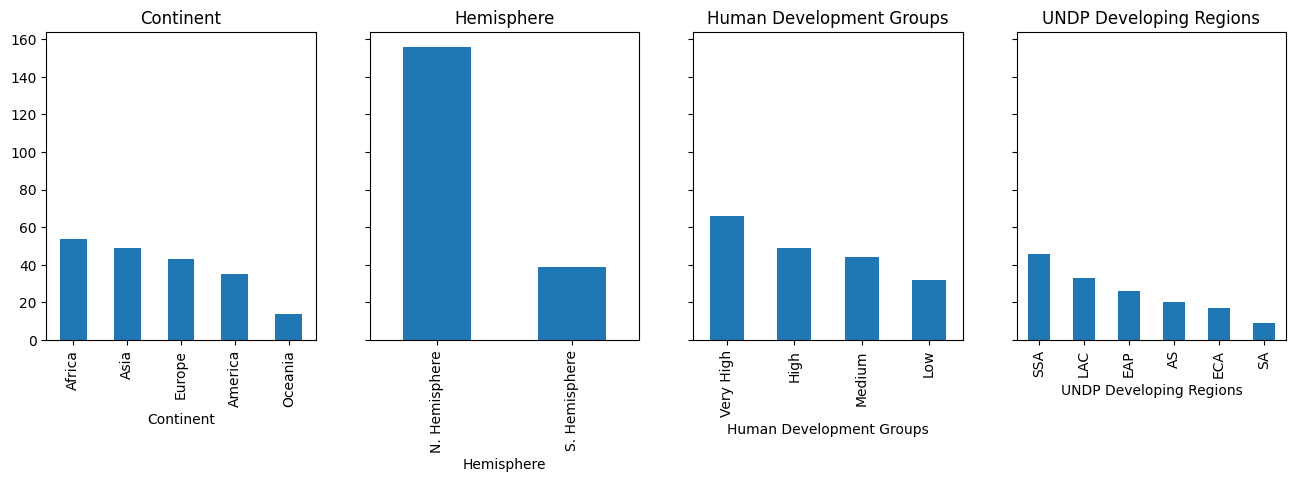

In [290]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharex='col', sharey='row')
g = df['Continent'].value_counts().plot(kind='bar', ax=axs[0]) 
k = df['Hemisphere'].value_counts().plot(kind='bar', ax=axs[1])
h = df['Human Development Groups'].value_counts().plot(kind='bar', ax=axs[2])
j = df['UNDP Developing Regions'].value_counts().plot(kind='bar', ax=axs[3])

g.set(title='Continent')
k.set(title='Hemisphere')
h.set(title='Human Development Groups')
j.set(title='UNDP Developing Regions')

plt.show()

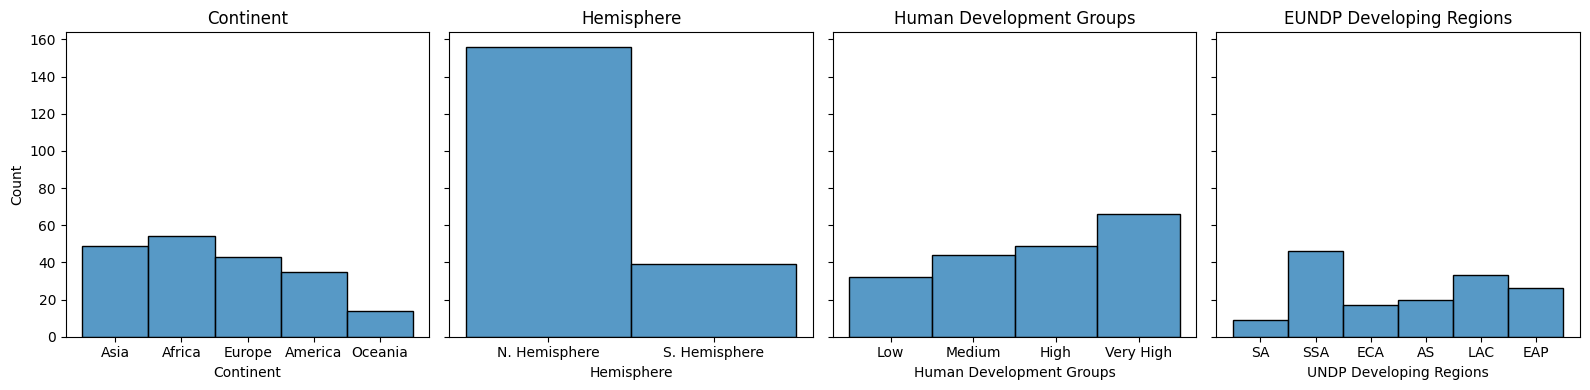

In [289]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharex='col', sharey='row')
g = sns.histplot(data=df, x= 'Continent', ax=axs[0])
k = sns.histplot(data=df, x= 'Hemisphere',ax=axs[1])
h = sns.histplot(data=df, x= 'Human Development Groups', ax=axs[2])
j = sns.histplot(data=df, x= 'UNDP Developing Regions', ax=axs[3])

g.set(title='Continent')
k.set(title='Hemisphere')
h.set(title='Human Development Groups')
j.set(title='EUNDP Developing Regions')
plt.tight_layout()

plt.show()

In [271]:
df_cont_HDG = df.groupby(['Human Development Groups'])['Continent'].value_counts(normalize=True).mul(100).rename("Count").reset_index()

- Africa stands out as the continent with the highest number of low and medium categories. Europe has the highest number of countries in the "Very High" group

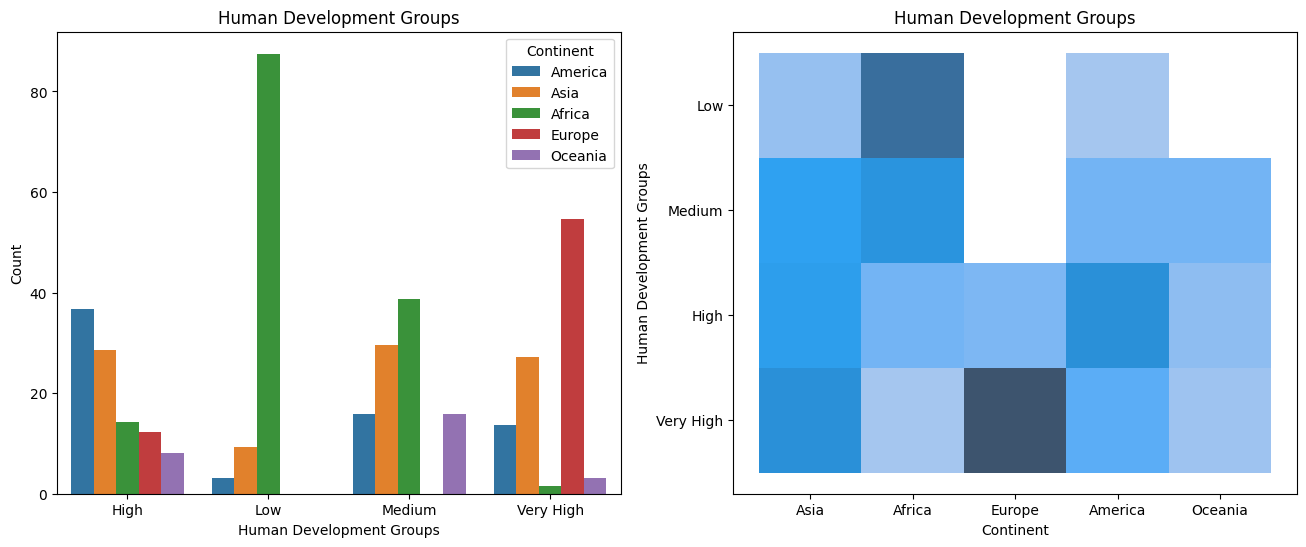

In [287]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
g = sns.barplot(data=df_cont_HDG, x = "Human Development Groups", y="Count", hue = 'Continent', ax=axs[0])
k = sns.histplot(data=df, x= 'Continent', y='Human Development Groups', legend=True, ax=axs[1])


g.set(title='Human Development Groups')
k.set(title='Human Development Groups')

plt.show()

In [284]:
df_Africa = df[(df['Continent'] == "Africa") & (df['Human Development Groups'] == "Very High")]

In [285]:
df_Africa

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Expected Years of Schooling (1990),Expected Years of Schooling (1991),Expected Years of Schooling (1992),...,Expected Years of Schooling (2015),Expected Years of Schooling (2016),Expected Years of Schooling (2017),Expected Years of Schooling (2018),Expected Years of Schooling (2019),Expected Years of Schooling (2020),Expected Years of Schooling (2021),Expected Years of Schoolng (STD),Expected Years of Schoolng (MEAN),Year 1990 to Year 2021
122,MUS,Mauritius,Africa,S. Hemisphere,Very High,SSA,63.0,10.49817,10.641567,10.784963,...,15.05727,15.09777,15.0566,15.114952,15.17353,15.17353,15.17353,1.638484,12.855526,4.67536


# Mean analysis on the Expected Years of Schooling (EYS)

Countries in Europe have the highest mean of EYS while Africa has the least. The countries in the "Very High" Humand Development Groups have the highest mean of EYS and those in Low have the least.


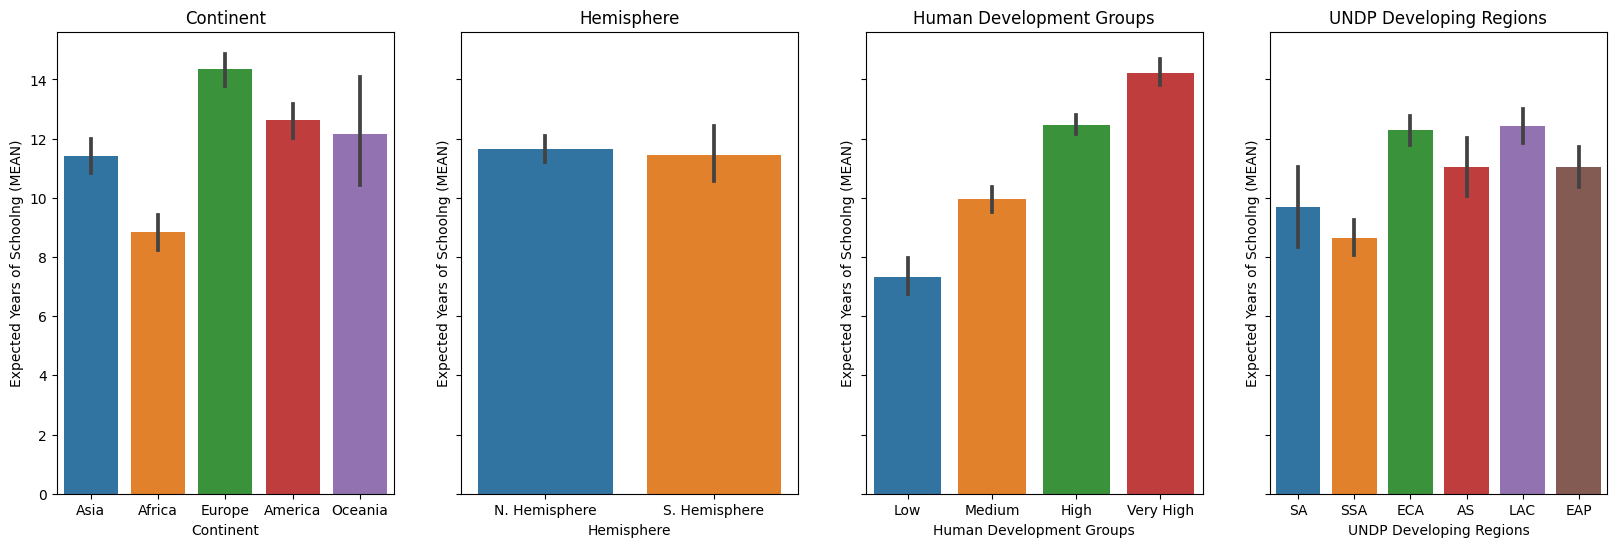

In [274]:
#how spread is the difference between the countries in the different continents
#sns.barplot(data=df, x='Continent', y='Expected Years of Schoolng (STD)')

fig, axs = plt.subplots(1, 4, figsize=(20, 6), sharex='col', sharey='row')
g = sns.barplot(data=df, x='Continent', y='Expected Years of Schoolng (MEAN)', ax=axs[0])
k = sns.barplot(data=df, x='Hemisphere', y='Expected Years of Schoolng (MEAN)',ax=axs[1])
h = sns.barplot(data=df, x='Human Development Groups', y='Expected Years of Schoolng (MEAN)', ax=axs[2])
j = sns.barplot(data=df, x='UNDP Developing Regions', y='Expected Years of Schoolng (MEAN)', ax=axs[3])

g.set(title='Continent')
k.set(title='Hemisphere')
h.set(title='Human Development Groups')
j.set(title='UNDP Developing Regions')
plt.show()

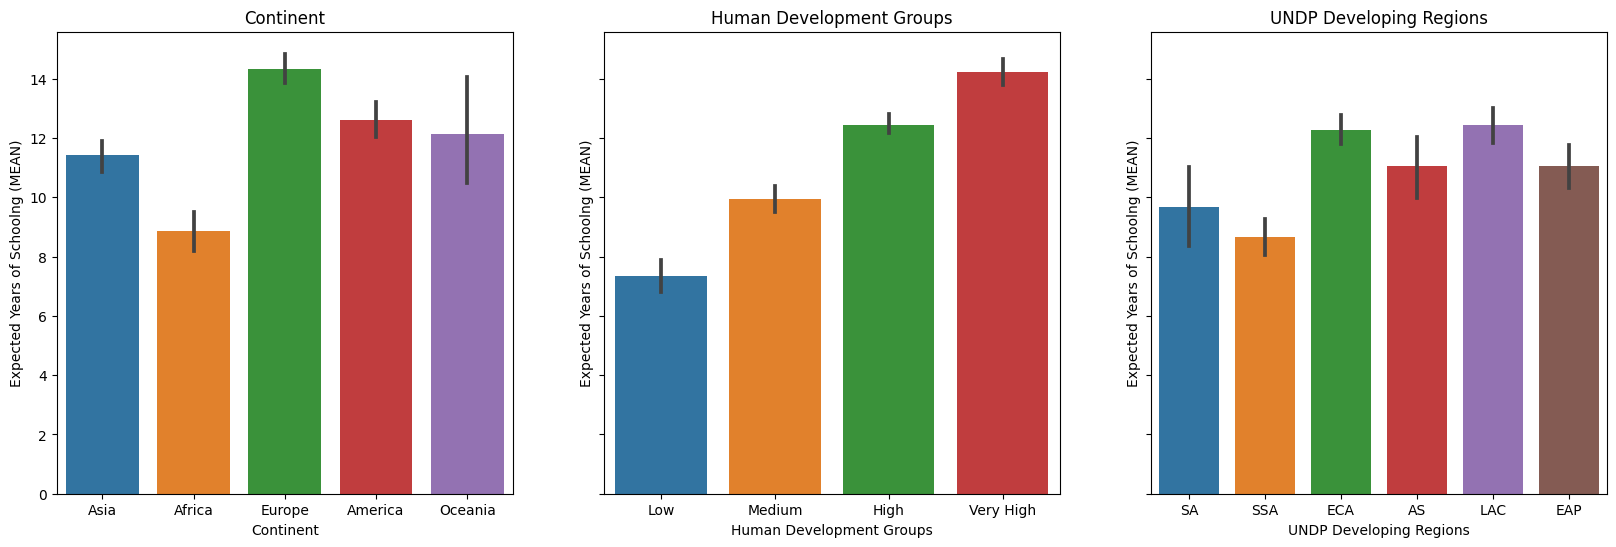

In [294]:
#how spread is the difference between the countries in the different continents
#sns.barplot(data=df, x='Continent', y='Expected Years of Schoolng (STD)')

fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharex='col', sharey='row')
g = sns.barplot(data=df, x='Continent', y='Expected Years of Schoolng (MEAN)', ax=axs[0])
h = sns.barplot(data=df, x='Human Development Groups', y='Expected Years of Schoolng (MEAN)', ax=axs[1])
j = sns.barplot(data=df, x='UNDP Developing Regions', y='Expected Years of Schoolng (MEAN)', ax=axs[2])

g.set(title='Continent')
h.set(title='Human Development Groups')
j.set(title='UNDP Developing Regions')
plt.show()

# Variance analysis on the Expected Years of Schooling (EYS)

Countries in the Sub-Saharan Africa UNDP Development region have a higher variance amongst themselves with regards to the EYS, 
indicating the inequality amongst the countries in the region. These countries are in the in Northern Hemispher and hence the data show that the same hemisphere has the higher variance too as compared to the Southern.

Countries in the Europe and Central Asia region have the least variance in EYS indicate a less inequality amongst these countries.

The countries in the low Human Development Group have the highest variance while those in Very High category have the least variance. Africa has the highest number of countries in the low category and Europe has the highest number of the Very High category.

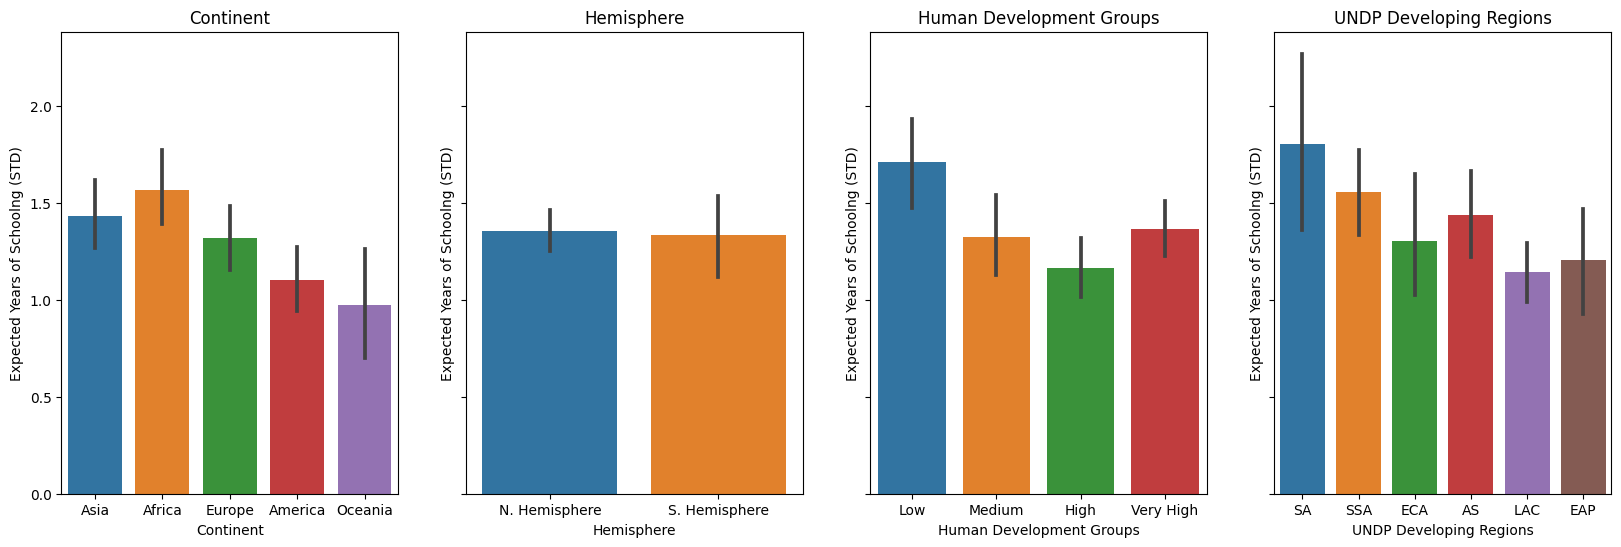

In [292]:
#how spread is the difference between the countries in the different continents
#sns.barplot(data=df, x='Continent', y='Expected Years of Schoolng (STD)')

fig, axs = plt.subplots(1, 4, figsize=(20, 6),  sharex='col',sharey='row')
g = sns.barplot(data=df, x='Continent', y='Expected Years of Schoolng (STD)', ax=axs[0])
k = sns.barplot(data=df, x='Hemisphere', y='Expected Years of Schoolng (STD)',ax=axs[1])
h = sns.barplot(data=df, x='Human Development Groups', y='Expected Years of Schoolng (STD)', ax=axs[2])
j = sns.barplot(data=df, x='UNDP Developing Regions', y='Expected Years of Schoolng (STD)', ax=axs[3])

g.set(title='Continent')
k.set(title='Hemisphere')
h.set(title='Human Development Groups')
j.set(title='UNDP Developing Regions')
plt.show()

# Movement of EYS over the years

- When comparing the EYS for the years 1990 and the year 2021, it can clearly bee seen that overall there has been an increase in the EYS. The minimum, median and the maximum number of the EYS all have increased in 2021 as compard to 1990.

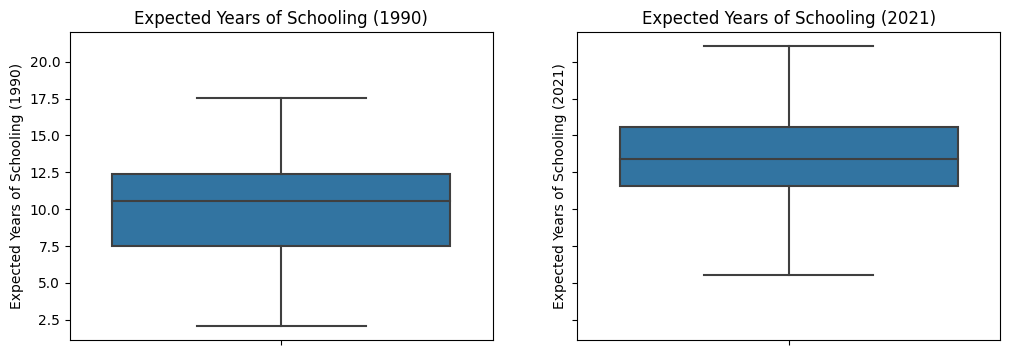

In [275]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex='col', sharey='row')
k = sns.boxplot(data=df, y= 'Expected Years of Schooling (2021)', ax=axs[1])
j = sns.boxplot(data=df, y= 'Expected Years of Schooling (1990)', ax=axs[0])

k.set(title='Expected Years of Schooling (2021)')
j.set(title='Expected Years of Schooling (1990)')

plt.show()

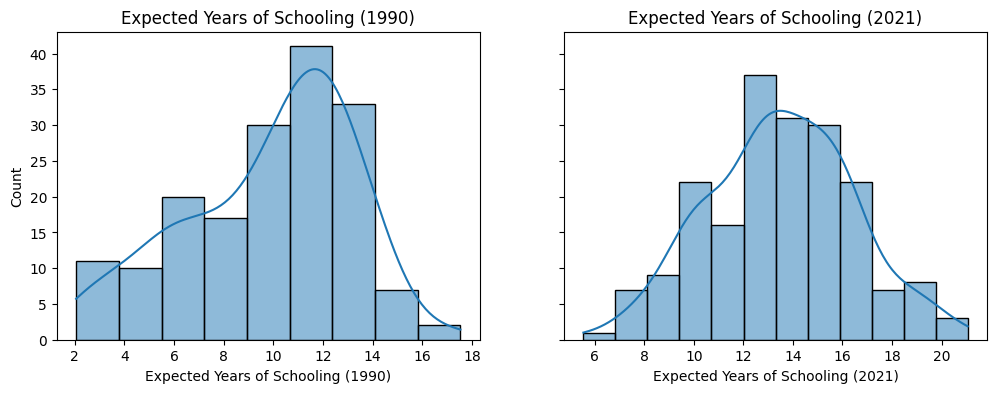

In [276]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex='col', sharey='row')
k = sns.histplot(data=df, x= 'Expected Years of Schooling (2021)', kde=True, ax=axs[1])
j = sns.histplot(data=df, x= 'Expected Years of Schooling (1990)', kde=True, ax=axs[0])

k.set(title='Expected Years of Schooling (2021)')
j.set(title='Expected Years of Schooling (1990)')

plt.show()

- Diving deeper into the continental level, the same increase can be seen on the EYS.

    - Asia: Both the minimum and maximum number of years have increased.
    - Africa: While there is an increase in both the minimum and maximum, there is also a notable decrease in the variance between 1990 and 2021.
    - Europe continent: An increase in observed. Also we observe that the variance has slightly increased.
    - America: There is an increase on all quartiles and a notable decrease in the variance
    - Oceania: On the year 1990, there are a few outlier however we see an increased variance in 2021 as compared to 1990.

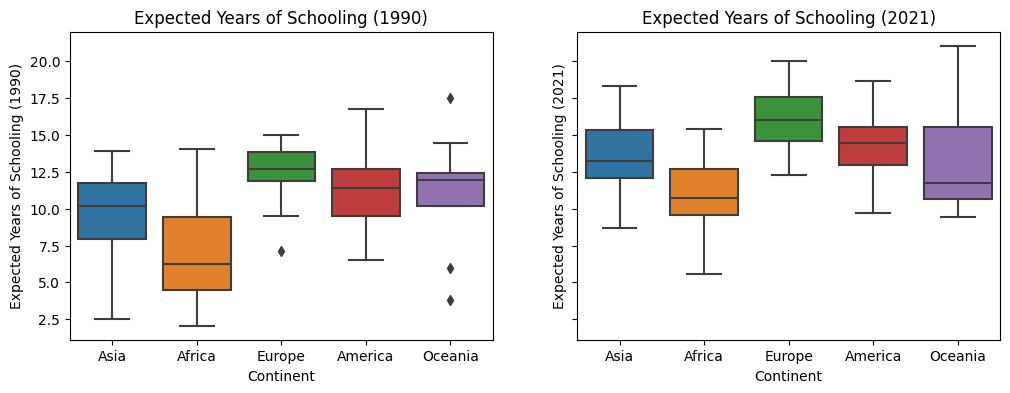

In [277]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex='col', sharey='row')
k = sns.boxplot(data=df, y= 'Expected Years of Schooling (2021)', x= 'Continent', ax=axs[1])
j = sns.boxplot(data=df, y= 'Expected Years of Schooling (1990)', x= 'Continent', ax=axs[0])

k.set(title='Expected Years of Schooling (2021)')
j.set(title='Expected Years of Schooling (1990)')

plt.show()

- A view of the increase in the EYS accross the continents when comparing year 1990 to the year 2021

<Axes: xlabel='Continent', ylabel='Year 1990 to Year 2021'>

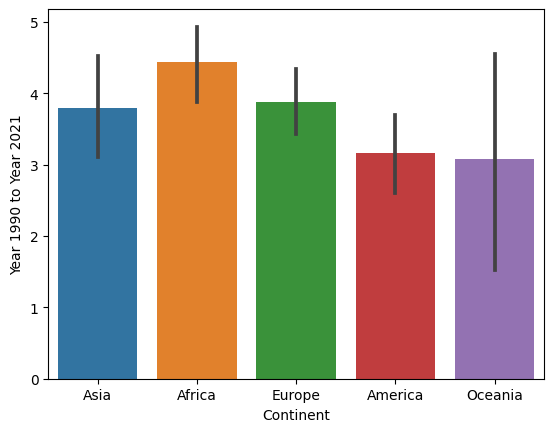

In [296]:
sns.barplot(data=df, y='Year 1990 to Year 2021', x = 'Continent')

- The Hemisphere level also shows the same improvement.
- One notable thing is that the Northern Hemisphere has surpassed the Southern Hemisphere. It now has a minimum and maximum as compared to the Southern Hemisphere, which has a few outliers.
- Both areas also show reduced variance in the EYS

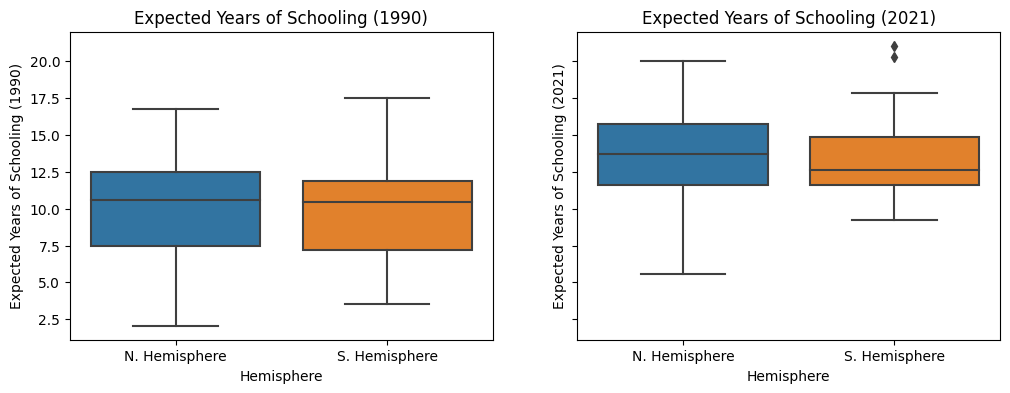

In [278]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex='col', sharey='row')
k = sns.boxplot(data=df, y= 'Expected Years of Schooling (2021)', x= 'Hemisphere', ax=axs[1])
j = sns.boxplot(data=df, y= 'Expected Years of Schooling (1990)', x= 'Hemisphere', ax=axs[0])



k.set(title='Expected Years of Schooling (2021)')
j.set(title='Expected Years of Schooling (1990)')

plt.show()

- Comparing year 1990 and 2021, there is an overall improvement in the EYS across all the Human Development groups.

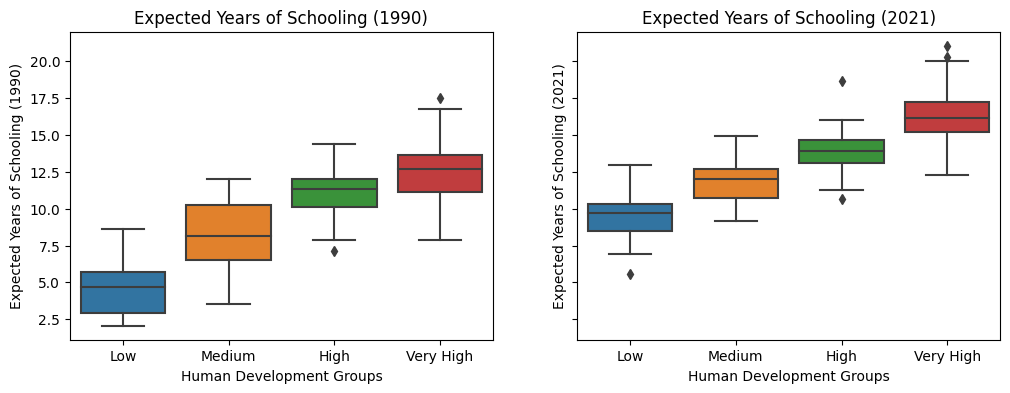

In [279]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex='col', sharey='row')
k = sns.boxplot(data=df, y= 'Expected Years of Schooling (2021)', x= 'Human Development Groups', ax=axs[1])
j = sns.boxplot(data=df, y= 'Expected Years of Schooling (1990)', x= 'Human Development Groups', ax=axs[0])


k.set(title='Expected Years of Schooling (2021)')
j.set(title='Expected Years of Schooling (1990)')

plt.show()

- In relation to the HDI Rank of 2021, Countries in Africa tend to have mostly a high HDI Rank and low EYS mean while those in Europe have mostly a lower HDI Rank and higher EYS mean

<Axes: xlabel='Expected Years of Schoolng (MEAN)', ylabel='HDI Rank (2021)'>

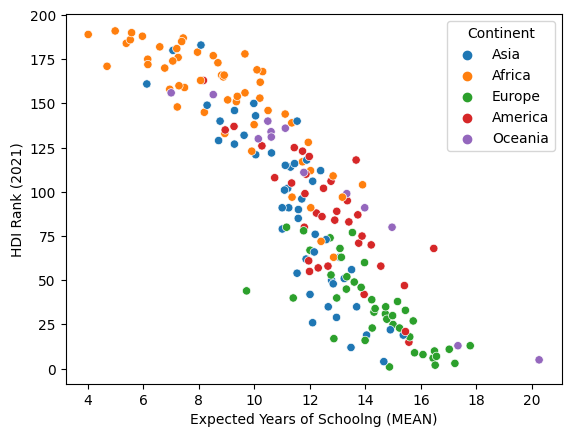

In [281]:
sns.scatterplot(data=df, x='Expected Years of Schoolng (MEAN)', y = 'HDI Rank (2021)', hue = 'Continent')

# Conclusion

Insights gathered from the dataset:

   - Africa has the most countries represented and Oceania has the least
   - The Human Development Group category of "Very High" has the most number of countries and "Low" category has the least number of countries.
   - Most of the countries that are considered to have "very high" human Development are in Europe and those considered to have low human development are in Africa
   - The Very high categorization is also supported by Europe having the highest mean in terms of the EYS and Africa having the lowest over the period 1990 to 2021.
   - Within the African continent, there is a high variance as shown by the standard deviation measure of the EYS and Oceania has the lowest variance amongst the countries in the continent.
   - When comparing the EYS of 1990 to that of the latest available data of 2021, there is a clear increase in the EYS accross all the countries in the dataset.
   - Africa is showing the most increase accross all the continents.
   - When looking at the HDI rankings of 2021, the data reveals that as Africa while having the lowest mean EYS, it also mainly has countries with very low HDI and hence ranking very low. Countries in Europe mostly have high mean EYS and high HDI resulting in high rankings in the HDI rankings. The HDI is a summary measure of human development as per the United Nations.
    